In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils

In [5]:
train='data/1_UNSW-NB15.csv'

train_data=pd.read_csv(train)

In [6]:
train_data = train_data[0:5000]

In [7]:
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [8]:
train_data.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
4995,4996,0.430266,tcp,ftp-data,FIN,8,10,364,3754,39.510443,...,1,2,0,0,0,2,1,0,Exploits,1
4996,4997,0.000005,srp,-,INT,2,0,200,0,200000.005100,...,2,5,0,0,0,11,5,0,Exploits,1
4997,4998,0.000005,srp,-,INT,2,0,200,0,200000.005100,...,2,5,0,0,0,11,5,0,DoS,1
4998,4999,0.000005,smp,-,INT,2,0,200,0,200000.005100,...,1,5,0,0,0,6,5,0,Fuzzers,1
4999,5000,0.626844,tcp,-,FIN,10,8,564,354,27.119986,...,1,1,0,0,0,1,1,0,Reconnaissance,1


In [21]:
# number of attack labels 
train_data['label'].value_counts()

1    4757
0     243
Name: label, dtype: int64

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
id                   5000 non-null int64
dur                  5000 non-null float64
proto                5000 non-null object
service              5000 non-null object
state                5000 non-null object
spkts                5000 non-null int64
dpkts                5000 non-null int64
sbytes               5000 non-null int64
dbytes               5000 non-null int64
rate                 5000 non-null float64
sttl                 5000 non-null int64
dttl                 5000 non-null int64
sload                5000 non-null float64
dload                5000 non-null float64
sloss                5000 non-null int64
dloss                5000 non-null int64
sinpkt               5000 non-null float64
dinpkt               5000 non-null float64
sjit                 5000 non-null float64
djit                 5000 non-null float64
swin                 5000 non-null int64
stcpb        

In [25]:
del train_data['service']

In [26]:
del train_data['id']
del train_data['state']

In [27]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train_data['proto']= label_encoder.fit_transform(train_data['proto'])
train_data['attack_cat']= label_encoder.fit_transform(train_data['attack_cat'])

train_data['proto'].unique()
train_data['attack_cat'].unique()

array([5, 6, 1, 2, 3, 0, 4, 8, 7], dtype=int64)

In [29]:
data = train_data.copy()

In [30]:
del data['attack_cat']

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
dur                  5000 non-null float64
proto                5000 non-null int32
spkts                5000 non-null int64
dpkts                5000 non-null int64
sbytes               5000 non-null int64
dbytes               5000 non-null int64
rate                 5000 non-null float64
sttl                 5000 non-null int64
dttl                 5000 non-null int64
sload                5000 non-null float64
dload                5000 non-null float64
sloss                5000 non-null int64
dloss                5000 non-null int64
sinpkt               5000 non-null float64
dinpkt               5000 non-null float64
sjit                 5000 non-null float64
djit                 5000 non-null float64
swin                 5000 non-null int64
stcpb                5000 non-null int64
dtcpb                5000 non-null int64
dwin                 5000 non-null int64
tcprtt          

In [32]:
X = data.drop(["label"],axis =1)
y = data["label"]

In [33]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=30)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(5000, 12)

In [34]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['dur',
 'sbytes',
 'rate',
 'sload',
 'sloss',
 'sinpkt',
 'smean',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst']

In [35]:
df = data[['dur',
 'sbytes',
 'rate',
 'sload',
 'sloss',
 'sinpkt',
 'smean',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
             'label']]
df.to_csv('unswnb_process.csv')

In [36]:
df['label'].value_counts()

1    4757
0     243
Name: label, dtype: int64

In [109]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(4000, 12) (4000,)
(1000, 12) (1000,)


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# SVM

In [40]:
from sklearn.svm import SVC

clf = SVC()
# fit the model 
clf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_hat = clf.predict(X_test)

svm_acc = accuracy_score(y_hat, y_test)
svm_prec = precision_score(y_hat, y_test,average='weighted')
svm_rec = recall_score(y_hat, y_test,average='weighted')
svm_f1 = f1_score(y_hat, y_test,average='weighted')

In [94]:
storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1)

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
# fit the model 
clf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_hat = clf.predict(X_test)

dt_acc = accuracy_score(y_hat, y_test)
dt_prec = precision_score(y_hat, y_test,average='weighted')
dt_rec = recall_score(y_hat, y_test,average='weighted')
dt_f1 = f1_score(y_hat, y_test,average='weighted')

In [95]:
storeResults('DT',dt_acc,dt_prec,dt_rec,dt_f1)

# Voting Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[25],
    "max_depth":[20]
    
}

from sklearn.model_selection import GridSearchCV
forest = GridSearchCV(rfc,parameters,cv=10)

clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('rf-parameter', forest), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [113]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [43]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', forest),('dt', DecisionTreeClassifier(random_state=10))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [114]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# LSTM-G

In [44]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
import torch
from torch import nn, optim
from torch.nn import functional as F

In [46]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [47]:
class lstm(nn.Module):
    def __init__(self):
        super(lstm, self).__init__()
        self.fc1 = nn.Linear(12, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 5)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.dropout(x)
        return self.fc4(x)

In [48]:
net = lstm()

In [49]:
optimizer = optim.AdamW(net.parameters())
criterion = nn.CrossEntropyLoss()

In [50]:
losses = []

In [51]:
max_test = 0
best_params = net.state_dict()
for epoch in range(1, 50):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    _, preds_y = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train, preds_y)
    
    pred_test = net(X_test)
    _, preds_test_y = torch.max(pred_test, 1)
    test_acc = accuracy_score(y_test, preds_test_y)
    print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(), 
                                                                      train_acc*100, test_acc * 100))
    if test_acc > max_test:
        max_test = test_acc
        best_params = net.state_dict()
net.load_state_dict(best_params)

Epoch 1, Loss: 1.6433401107788086, Acc:0.00%, Test Acc: 0.00%
Epoch 2, Loss: 1.6084755659103394, Acc:0.03%, Test Acc: 49.60%
Epoch 3, Loss: 1.5733959674835205, Acc:50.35%, Test Acc: 93.50%
Epoch 4, Loss: 1.5381931066513062, Acc:95.40%, Test Acc: 93.90%
Epoch 5, Loss: 1.5024710893630981, Acc:95.45%, Test Acc: 93.90%
Epoch 6, Loss: 1.465619683265686, Acc:95.45%, Test Acc: 93.90%
Epoch 7, Loss: 1.426993727684021, Acc:95.45%, Test Acc: 93.90%
Epoch 8, Loss: 1.386312484741211, Acc:95.45%, Test Acc: 93.90%
Epoch 9, Loss: 1.3428707122802734, Acc:95.45%, Test Acc: 93.90%
Epoch 10, Loss: 1.2962194681167603, Acc:95.45%, Test Acc: 93.90%
Epoch 11, Loss: 1.2456471920013428, Acc:95.45%, Test Acc: 93.90%
Epoch 12, Loss: 1.1911083459854126, Acc:95.45%, Test Acc: 93.90%
Epoch 13, Loss: 1.1329659223556519, Acc:95.45%, Test Acc: 93.90%
Epoch 14, Loss: 1.0699912309646606, Acc:95.45%, Test Acc: 93.90%
Epoch 15, Loss: 1.0017693042755127, Acc:95.45%, Test Acc: 93.90%
Epoch 16, Loss: 0.9297675490379333, Acc:

<All keys matched successfully>

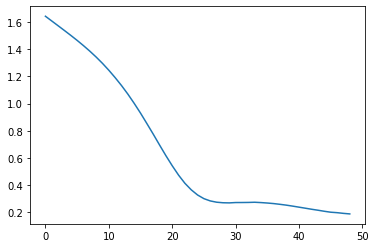

In [54]:
plt.plot(losses)

In [55]:
pred_test = net(X_test)
_, preds_y = torch.max(pred_test, 1)

In [56]:
lstmg_acc = accuracy_score(y_test, preds_y)
lstmg_prec = precision_score(y_test, preds_y,average='weighted')
lstmg_rec = recall_score(y_test, preds_y,average='weighted')
lstmg_f1 = f1_score(y_test, preds_y,average='weighted')

In [96]:
storeResults('LSTM-G',lstmg_acc,lstmg_prec,lstmg_rec,lstmg_f1)

# CNN-G

In [57]:
class cnn(nn.Module):
    def __init__(self):
        super(cnn, self).__init__()
        self.fc1 = nn.Linear(12, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 5)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.dropout(x)
        return self.fc4(x)

In [58]:
net = cnn()

In [59]:
optimizer = optim.AdamW(net.parameters())
criterion = nn.CrossEntropyLoss()

losses = []

max_test = 0
best_params = net.state_dict()
for epoch in range(1, 50):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    _, preds_y = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train, preds_y)
    
    pred_test = net(X_test)
    _, preds_test_y = torch.max(pred_test, 1)
    test_acc = accuracy_score(y_test, preds_test_y)
    print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(), 
                                                                      train_acc*100, test_acc * 100))
    if test_acc > max_test:
        max_test = test_acc
        best_params = net.state_dict()
net.load_state_dict(best_params)

Epoch 1, Loss: 1.6426633596420288, Acc:0.62%, Test Acc: 10.80%
Epoch 2, Loss: 1.6042218208312988, Acc:10.70%, Test Acc: 93.80%
Epoch 3, Loss: 1.5657554864883423, Acc:94.92%, Test Acc: 93.90%
Epoch 4, Loss: 1.527076244354248, Acc:95.45%, Test Acc: 93.90%
Epoch 5, Loss: 1.4878555536270142, Acc:95.45%, Test Acc: 93.90%
Epoch 6, Loss: 1.44783616065979, Acc:95.45%, Test Acc: 93.90%
Epoch 7, Loss: 1.4056551456451416, Acc:95.45%, Test Acc: 93.90%
Epoch 8, Loss: 1.3600025177001953, Acc:95.45%, Test Acc: 93.90%
Epoch 9, Loss: 1.3100696802139282, Acc:95.45%, Test Acc: 93.90%
Epoch 10, Loss: 1.2557576894760132, Acc:95.45%, Test Acc: 93.90%
Epoch 11, Loss: 1.195657730102539, Acc:95.45%, Test Acc: 93.90%
Epoch 12, Loss: 1.130983591079712, Acc:95.45%, Test Acc: 93.90%
Epoch 13, Loss: 1.0598430633544922, Acc:95.45%, Test Acc: 93.90%
Epoch 14, Loss: 0.9844179153442383, Acc:95.45%, Test Acc: 93.90%
Epoch 15, Loss: 0.9035926461219788, Acc:95.45%, Test Acc: 93.90%
Epoch 16, Loss: 0.8204004764556885, Acc:

<All keys matched successfully>

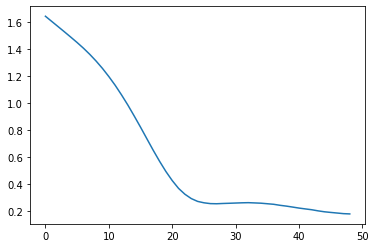

In [60]:
plt.plot(losses)

pred_test = net(X_test)
_, preds_y = torch.max(pred_test, 1)

cnng_acc = accuracy_score(y_test, preds_y)
cnng_prec = precision_score(y_test, preds_y,average='weighted')
cnng_rec = recall_score(y_test, preds_y,average='weighted')
cnng_f1 = f1_score(y_test, preds_y,average='weighted')

In [97]:
storeResults('CNN-G',cnng_acc,cnng_prec,cnng_rec,cnng_f1)

# DNN-G

In [61]:
class dnn(nn.Module):
    def __init__(self):
        super(dnn, self).__init__()
        self.fc1 = nn.Linear(12, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 5)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.dropout(x)
        return self.fc4(x)

In [62]:
net = dnn()

In [63]:
optimizer = optim.AdamW(net.parameters())
criterion = nn.CrossEntropyLoss()

In [64]:
losses = []

In [65]:
max_test = 0
best_params = net.state_dict()
for epoch in range(1, 50):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    _, preds_y = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train, preds_y)
    
    pred_test = net(X_test)
    _, preds_test_y = torch.max(pred_test, 1)
    test_acc = accuracy_score(y_test, preds_test_y)
    print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(), 
                                                                      train_acc*100, test_acc * 100))
    if test_acc > max_test:
        max_test = test_acc
        best_params = net.state_dict()
net.load_state_dict(best_params)

Epoch 1, Loss: 1.6693103313446045, Acc:3.77%, Test Acc: 4.60%
Epoch 2, Loss: 1.6364161968231201, Acc:3.52%, Test Acc: 4.60%
Epoch 3, Loss: 1.6047687530517578, Acc:3.10%, Test Acc: 72.30%
Epoch 4, Loss: 1.573276400566101, Acc:75.15%, Test Acc: 93.90%
Epoch 5, Loss: 1.5414459705352783, Acc:95.43%, Test Acc: 93.90%
Epoch 6, Loss: 1.5095566511154175, Acc:95.45%, Test Acc: 93.90%
Epoch 7, Loss: 1.4752298593521118, Acc:95.45%, Test Acc: 93.90%
Epoch 8, Loss: 1.4393025636672974, Acc:95.45%, Test Acc: 93.90%
Epoch 9, Loss: 1.4006553888320923, Acc:95.45%, Test Acc: 93.90%
Epoch 10, Loss: 1.3579394817352295, Acc:95.45%, Test Acc: 93.90%
Epoch 11, Loss: 1.3115023374557495, Acc:95.45%, Test Acc: 93.90%
Epoch 12, Loss: 1.261152744293213, Acc:95.45%, Test Acc: 93.90%
Epoch 13, Loss: 1.2065515518188477, Acc:95.45%, Test Acc: 93.90%
Epoch 14, Loss: 1.1471229791641235, Acc:95.45%, Test Acc: 93.90%
Epoch 15, Loss: 1.0832042694091797, Acc:95.45%, Test Acc: 93.90%
Epoch 16, Loss: 1.0144752264022827, Acc:9

<All keys matched successfully>

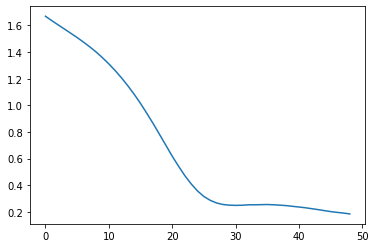

In [66]:
plt.plot(losses)

In [67]:
pred_test = net(X_test)
_, preds_y = torch.max(pred_test, 1)

In [68]:
dnng_acc = accuracy_score(y_test, preds_y)
dnng_prec = precision_score(y_test, preds_y,average='weighted')
dnng_rec = recall_score(y_test, preds_y,average='weighted')
dnng_f1 = f1_score(y_test, preds_y,average='weighted')

In [98]:
storeResults('DNN-G',dnng_acc,dnng_prec,dnng_rec,dnng_f1)

# CNN

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2)

In [71]:
#X_train=X_train.values
#X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [74]:
verbose, epoch, batch_size = 1, 100, 32
activationFunction='relu'

def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(2, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 11, 128)           384       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1282      
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________


In [75]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/5
100/100 [==============================] - 4s 6ms/step - loss: 896330.5000 - accuracy: 0.9047 - val_loss: 62126.3164 - val_accuracy: 0.9588
Epoch 2/5
100/100 [==============================] - 1s 6ms/step - loss: 551135.2500 - accuracy: 0.9131 - val_loss: 125760.0000 - val_accuracy: 0.9600
Epoch 3/5
100/100 [==============================] - 1s 6ms/step - loss: 572774.7500 - accuracy: 0.9291 - val_loss: 70087.6250 - val_accuracy: 0.9525
Epoch 4/5
100/100 [==============================] - 1s 6ms/step - loss: 551003.1875 - accuracy: 0.9331 - val_loss: 90782.3984 - val_accuracy: 0.9563
Epoch 5/5
100/100 [==============================] - 1s 6ms/step - loss: 562968.5625 - accuracy: 0.9291 - val_loss: 29080.4316 - val_accuracy: 0.9563


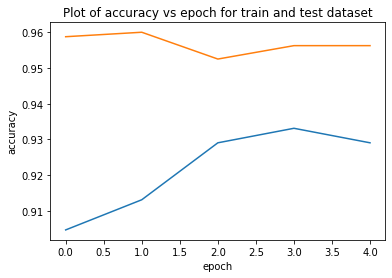

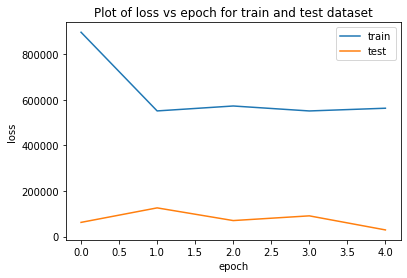

In [76]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [77]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

cnn_acc = accuracy_score(y_pred, y_test)
cnn_prec = precision_score(y_pred, y_test,average='weighted')
cnn_rec = recall_score(y_pred, y_test,average='weighted')
cnn_f1 = f1_score(y_pred, y_test,average='weighted')

32/32 [==============================] - 0s 2ms/step


In [99]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

# LSTM

In [78]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(14,1))
#print(model.summary())

In [79]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=32, verbose=1)

Epoch 1/5
125/125 [==============================] - 34s 137ms/step - loss: 1.1379e-07 - accuracy: 0.6487 - val_loss: 1.1361e-07 - val_accuracy: 0.8490
Epoch 2/5
125/125 [==============================] - 16s 129ms/step - loss: 1.1328e-07 - accuracy: 0.6548 - val_loss: 1.1361e-07 - val_accuracy: 0.8490
Epoch 3/5
125/125 [==============================] - 16s 131ms/step - loss: 1.1296e-07 - accuracy: 0.6546 - val_loss: 1.1361e-07 - val_accuracy: 0.8490
Epoch 4/5
125/125 [==============================] - 16s 132ms/step - loss: 1.1375e-07 - accuracy: 0.6537 - val_loss: 1.1361e-07 - val_accuracy: 0.8490
Epoch 5/5
125/125 [==============================] - 17s 136ms/step - loss: 1.1318e-07 - accuracy: 0.6529 - val_loss: 1.1361e-07 - val_accuracy: 0.8490


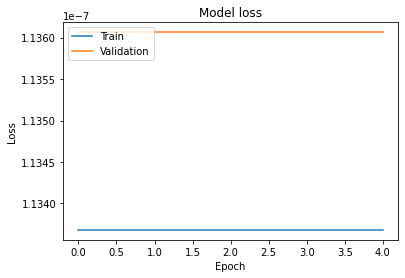

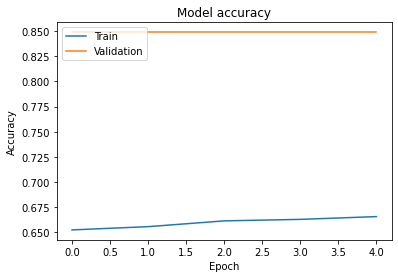

32/32 [==============================] - 2s 36ms/step


In [80]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

lstm_acc = accuracy_score(y_pred, y_test)
lstm_prec = precision_score(y_pred, y_test,average='weighted')
lstm_rec = recall_score(y_pred, y_test,average='weighted')
lstm_f1 = f1_score(y_pred, y_test,average='weighted')

#storeResults('LSTM',dl_acc,dl_prec,dl_rec,dl_f1)

In [100]:
storeResults('LSTM',lstm_acc,lstm_prec,lstm_rec,lstm_f1)

# DNN

In [81]:
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=1)

In [83]:
n_inputs = X_train.shape[1]

In [84]:
from sklearn.preprocessing import MinMaxScaler
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [85]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization

# define encoder
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs * 2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [86]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

In [87]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [88]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [89]:
history = model.fit(X_train, X_train, epochs=5, batch_size=32, verbose=0, validation_data=(X_test,X_test))

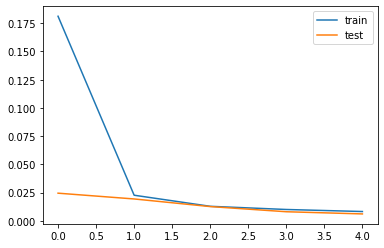

In [90]:
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [91]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)

# save the encoder to file
encoder.save('encoder1.h5')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [92]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
## So effectively , its like dimensinality reduction or feature extraction

# define the model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=1, max_iter=300)  
## specifying max_iter = 200 , to avoid the CONVERGENCE WARNING
## Why do we get CONVERGENCE WARNING ?
## because the model has converged already , but our loop is still training ovwr many epochs.
## Reduce the epochs

# fit the model on the training set
model.fit(X_train_encode, y_train)

# make predictions on the test set
yhat = model.predict(X_test_encode)

# calculate classification accuracy
acc = accuracy_score(y_test, yhat)

In [93]:
dnn_acc = accuracy_score(y_test, yhat)
dnn_prec = precision_score(y_test, yhat,average='weighted')
dnn_rec = recall_score(y_test, yhat,average='weighted')
dnn_f1 = f1_score(y_test, yhat,average='weighted')

In [101]:
storeResults('DNN',dnn_acc,dnn_prec,dnn_rec,dnn_f1)

# Comparison

In [115]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        
                      })

In [116]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,SVM,0.939,0.969,0.939,1.000
1,DT,0.984,0.984,0.984,0.984
2,LSTM-G,0.939,0.909,0.939,0.882
3,CNN-G,0.939,0.909,0.939,0.882
4,DNN-G,0.939,0.909,0.939,0.882
5,CNN,0.961,0.972,0.961,0.988
6,LSTM,0.047,0.090,0.047,1.000
7,DNN,0.979,0.977,0.979,0.978
8,Voting Classifier,0.984,0.984,0.984,0.984
9,Stacking Classifier,0.998,0.998,0.998,0.998


# Modelling

In [117]:
import joblib
filename = 'model_unsw.sav'
joblib.dump(clf1, filename)

['model_unsw.sav']

# Graph

In [118]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

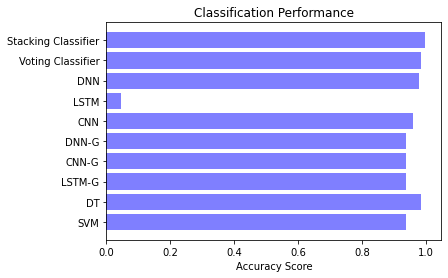

In [119]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

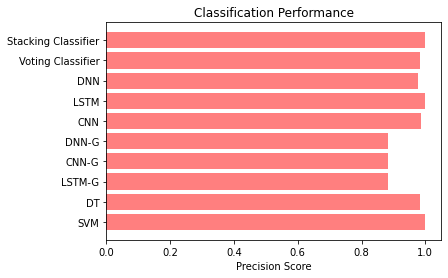

In [120]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

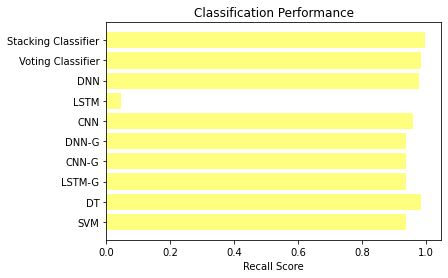

In [121]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1Score

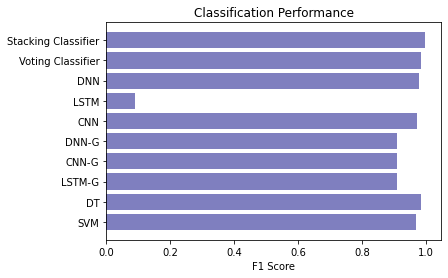

In [122]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()